In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, roc_curve

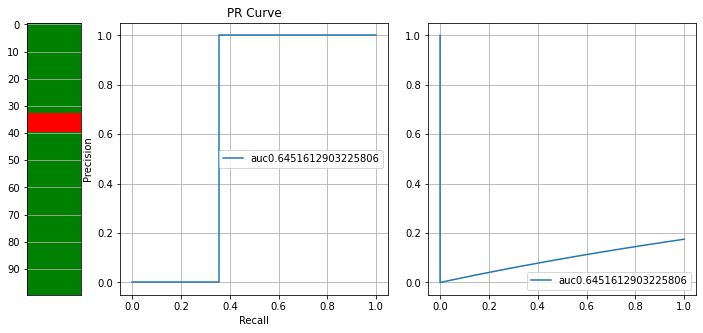

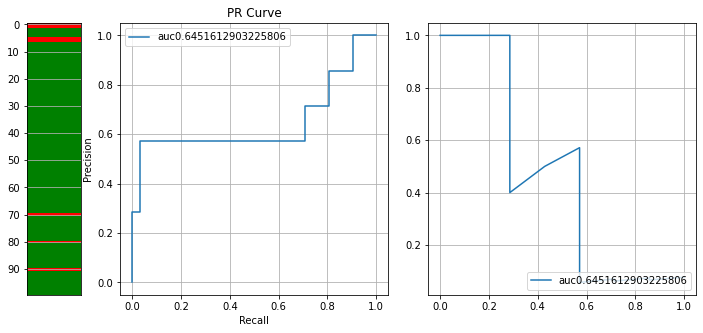

In [21]:
def plot_results(values, scores):
    
    y_test = data[::-1]
    
    _, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2, 10, 10]}, figsize=(12,5))
    
    cmap = colors.ListedColormap(['green', 'red'])
    bounds = [0, 0.5, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    a0.imshow(values, norm=norm, cmap=cmap)
    a0.set_yticks(np.arange(0,100,10))
    a0.set_aspect('auto')
    a0.grid(axis='y')
    
    a0.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False
    )
    
    # Plot ROC AUC
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc_value = roc_auc_score(y_test, scores)
    a1.plot(fpr, tpr, label='auc'+str(roc_auc_value))
    a1.legend(loc=0)
    a1.grid(True)
    a1.set_title('ROC Curve')
    a1.set_ylabel('True Positive Rate')
    a1.set_xlabel('False Positive Rate')
    
    # Plot ROC AUC
    precision, recall, thresholds = precision_recall_curve(y_test, scores)
    pr_auc = auc(recall, precision)
    a2.plot(recall, precision, label='auc'+str(roc_auc_value))
    a2.legend(loc=4)
    a2.grid(True)
    a1.set_title('PR Curve')
    a1.set_ylabel('Precision')
    a1.set_xlabel('Recall')
    
    plt.show()
    
scores = []
for i in range(100):
    scores.append(i/100)

# First example
data = np.zeros((100,1))
data[33:40][:] = 1
y_test = data[::1]

plot_results(data, scores)

# Second example
data = np.zeros((100,1))

# Possible "good" classifications
data[0][:] = 1
data[1][:] = 1
data[5][:] = 1
data[6][:] = 1

# Possible "noise"
data[70][:] = 1
data[80][:] = 1
data[90][:] = 1

plot_results(data, scores)